In [5]:
%matplotlib inline

# What is PCA?

## 主成分分析とは

主成分分析（しゅせいぶんぶんせき、英語: principal component analysis、PCAと略すこともある）は、直交回転を用いて変数間に相関がある元の観測値を、相関の無い主成分とよばれる値に変換するための数学的な手続きのことである。主成分分析は、1901年にカール・ピアソンによって開発された手法である。KL展開（Karhunen-Loève expansion）とも呼ばれる。主成分は、分散共分散行列（あるいは相関係数行列）に対する固有値分解あるいは、分散共分散行列（相関係数行列）に対応した偏差行列（相関係数行列の場合には標準化された行列）の特異値分解によって得ることができる。主成分分析の結果は、元の観測値（対象）に対応した変換後の値である主成分得点と、各々の主成分得点に対する変数の重みに相当する主成分負荷量として得られ、一般的にはこの2つの状況をそれぞれに可視化した主成分プロット、あるいは2つの図を重ねあわせたバイプロットを通して結果を解釈する。主成分分析を実行するためのソフトウェアや関数によって、観測値の基準化の方法や数値計算のアルゴリズムに微細な差異が多く存在し、必ずしも全く同じ値が出るとは限らない（例えば、Rにおけるprcomp関数とFactoMineRのPCA関数の結果は異なる）。

by [wikipedia](http://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)


(よくわからない）

数式とか、導出とか、気になる方は後ほど調べてみてください．
今回はなるべく直感的に分かるよう説明します．

## PCAについて
- 教師なし学習の一つ
- データの分散が大きいところ（主成分）をみつける

### やってること（イメージ）
1. データの分散が最大となる方向を見つける
2. 新しいデータ表現軸として1.で求めた方向を基底にする
3. 上記でとった軸と直交する方向に対して分散が最大となる方向を探す
4. 2.〜3.を元のデータの次元分だけくり返す

### どう役に立つのか？
- データの次元を圧縮するのに役立つ
- データの特性を抽出するのに役立つ
- 多次元特徴量の可視化に役立つ

## イメージこんな感じ

![Example](http://cnx.org/resources/269e78e2506cdbdc7f45ca17bb7d83491ce0c644/pca.jpg)

by [http://cnx.org/resources/269e78e2506cdbdc7f45ca17bb7d83491ce0c644/pca.jpg](http://cnx.org/resources/269e78e2506cdbdc7f45ca17bb7d83491ce0c644/pca.jpg)



## とりあえずやってみよう

### サンプルデータを作る
二次元の正規分布からデータをランダムサンプリングします．

分散共分散は下記の通り（あまり気にしない）

```
2.9  -2.2
-2.2  6.5
```

今回は200サンプルを生成します．

In [6]:
import numpy as np
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)  # 200 samples

データを10個ぐらい見てみます

In [7]:
np.set_printoptions(4, suppress=True) # show only four decimals
print X[:10,:]                        # print the first 10 rows of X (from 0 to 9)

[[ 2.008   0.1628]
 [-0.0326 -2.7002]
 [ 2.4856 -2.7791]
 [ 2.7062 -2.2573]
 [ 1.586   3.8585]
 [-0.0144  0.0259]
 [ 1.4101 -0.2552]
 [ 0.4121  1.7315]
 [ 0.6801 -0.6442]
 [ 1.1693  0.4768]]


データを可視化してみましょう

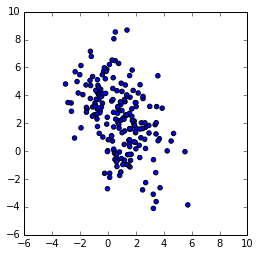

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;

PCAをやってみる

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

結果を見てみる

In [10]:
pca.components_  # これが計算された基底（軸）になります

array([[-0.4035,  0.915 ],
       [ 0.915 ,  0.4035]])

In [11]:
pca.mean_  #データの平均

array([ 0.8252,  2.3109])

In [12]:
pca.explained_variance_ratio_  # 固有値が占める割合(各軸の重要度)

array([ 0.7734,  0.2266])

PCAで射影されたデータを見る

X_pcaはPCAによって求めた軸上で見た時のデータに変換されたもの

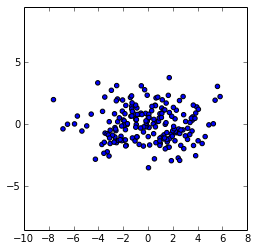

In [15]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal');

ちゃんとデータが多い方向に軸がとり直されてる。

元のデータをPCAで求めた軸上にプロットしてみる

元データから平均を引いて，軸上に射影する

In [16]:
Y = np.dot((X - pca.mean_), pca.components_.T)

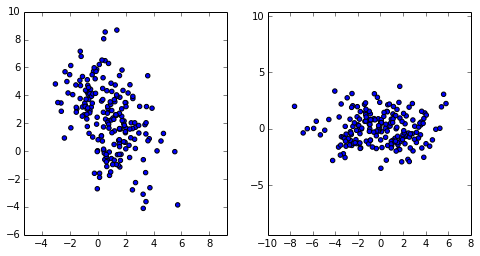

In [17]:
plt.figure(figsize=(8,4))

# 元のデータ
plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

# 射影されたデータ
plt.subplot(122)
plt.scatter(Y[:,0], Y[:,1])
plt.axis('equal');

# 顔データをPCAしてみる

画像データは２次元のデータ列
->PCAをするとどうなるのか？

## 今回の実験
画像のサイズ64*64px, 400人の顔データをPCAしてみる
それぞれの軸がどのようなデータの意味を表しているのかをみてみる

In [34]:
# load data

import matplotlib as mpl
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()

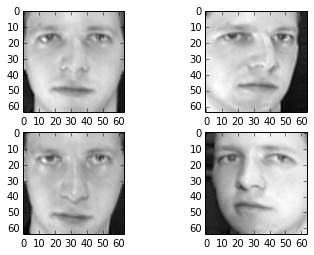

In [35]:
# データの中身確認1

plt.subplot(221)
plt.imshow(data.images[0], cmap=mpl.cm.gray)
plt.subplot(222)
plt.imshow(data.images[1], cmap=mpl.cm.gray)
plt.subplot(223)
plt.imshow(data.images[2], cmap=mpl.cm.gray)
plt.subplot(224)
plt.imshow(data.images[3], cmap=mpl.cm.gray)

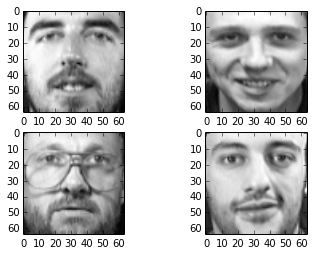

In [36]:
# データの中身確認2

plt.subplot(221)
plt.imshow(data.images[100], cmap=mpl.cm.gray)
plt.subplot(222)
plt.imshow(data.images[111], cmap=mpl.cm.gray)
plt.subplot(223)
plt.imshow(data.images[132], cmap=mpl.cm.gray)
plt.subplot(224)
plt.imshow(data.images[153], cmap=mpl.cm.gray)

PCAをやってみる

In [39]:
# resize data 2d image to 1d vector
data_reshaped = data.images.reshape((len(data.images), -1))
print('shape of data matrix: {}'.format(data_reshaped.shape))

shape of data matrix: (400, 4096)


In [40]:
# compute PCA
pca_face = PCA()
pca_face.fit(data_reshaped)
print(pca_face.components_.shape)

(400, 4096)


平均画像を見てみる
(PCAで求めた重心)

(64, 64)


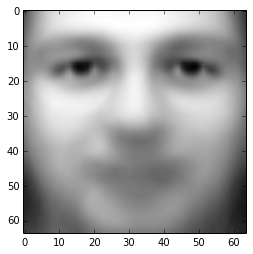

In [41]:
# Plot the mean faces
image_shape = (64, 64)
mean_face = pca_face.mean_.reshape(image_shape)
print mean_face.shape
plt.imshow(mean_face, cmap=mpl.cm.gray)

下記のデータをPCAで求めた基底に射影してみる

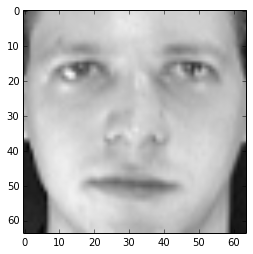

In [136]:
# この人を使います
plt.imshow(data.images[0], cmap=mpl.cm.gray)

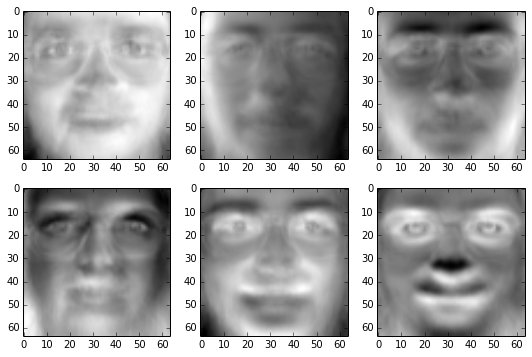

In [122]:
face_01 = data.images[0].reshape(-1)

def get_pca_image(img, dim):
    A = np.dot((img - pca_face.mean_), pca_face.components_.T[:, dim])
    A_inv = pca_face.components_.T[:, dim].dot(A)
    return A_inv

plt.figure(figsize=(9, 9))

A = get_pca_image(face_01, 0)
plt.subplot(331)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

A = get_pca_image(face_01, 1)
plt.subplot(332)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

A = get_pca_image(face_01, 2)
plt.subplot(333)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

A = get_pca_image(face_01, 3)
plt.subplot(334)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

A = get_pca_image(face_01, 4)
plt.subplot(335)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

A = get_pca_image(face_01, 5)
plt.subplot(336)
plt.imshow(A.reshape(image_shape), cmap=mpl.cm.gray)

In [141]:
def draw_face_compressed(img, ndim):
    A = np.dot((face_01 - pca_face.mean_), pca_face.components_.T[:, :ndim])
    A_inv = pca_face.components_.T[:, :ndim].dot(A) + pca_face.mean_
    return A_inv

## 固有値の分布

固有値が大きい軸ほど，データのばらつきが大きい -> 重要度が大きい

下記に固有値の大きさの分布をグラフ化してみる

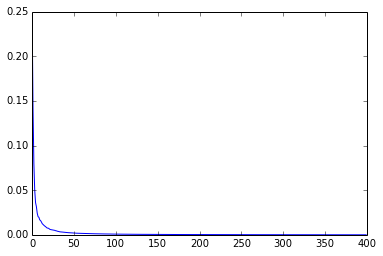

In [150]:
num_eigen = pca_face.explained_variance_ratio_.shape[0]
plt.plot(np.arange(num_eigen), pca_face.explained_variance_ratio_)

上記より，ほぼ最初の十数本の重要度が大きいことがわかる

下記に軸が何本あると固有値の何％になるかをグラフ化する（累積分布）

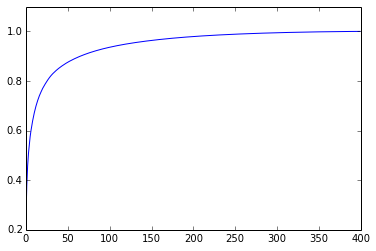

In [156]:
# 固有値の累積分布

plt.plot(np.arange(num_eigen), np.cumsum(pca_face.explained_variance_ratio_))

縦軸が累積度（0.0-1.0)，横軸が基底ベクトル（データを表している軸）の本数

上記より，大体25本ぐらいの軸が，80%ぐらいの重要度をもっている

### 何本分の固有ベクトルがあればデータの何割を表すことができるか？

In [42]:
# 50%
print('データの50%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca_face.explained_variance_ratio_) < 0.50)))

# 75%
print('データの75%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca_face.explained_variance_ratio_) < 0.75)))

# 85%
print('データの85%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca_face.explained_variance_ratio_) < 0.85)))

# 95%
print('データの95%を表すのに軸は: {} 本'.format(np.sum(np.cumsum(pca_face.explained_variance_ratio_) < 0.95)))

データの50%を表すのに軸は: 3 本
データの75%を表すのに軸は: 18 本
データの85%を表すのに軸は: 39 本
データの95%を表すのに軸は: 122 本


つまり，本来この画像は 64x64px = 4096次元のデータだが，
122本の軸（122次元)あればこのデータの95%を表現可能！


### 4096次元 -> 10次元で圧縮したもの
先ほどの顔画像を，10次元で表すとこうなる

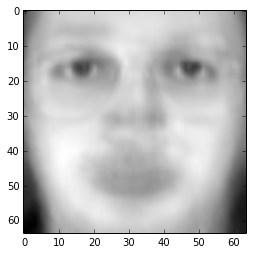

In [170]:
n_dim = 10
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 50次元で圧縮したもの
先ほどの顔画像を，50次元で表すとこうなる

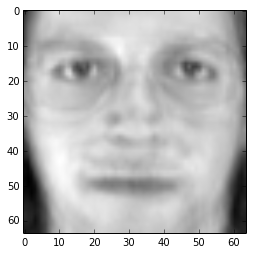

In [172]:
n_dim = 50
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 100次元で圧縮したもの

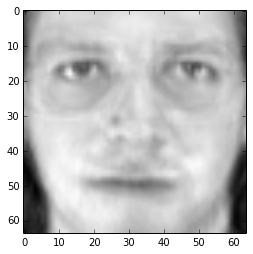

In [173]:
n_dim = 100
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 122次元で圧縮したもの

In [ ]:
n_dim = 122
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 200次元で圧縮したもの

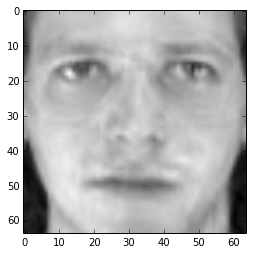

In [175]:
n_dim = 200
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 300次元で圧縮したもの

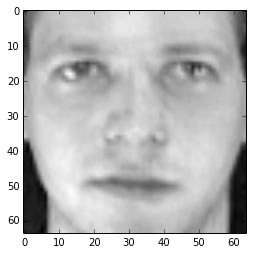

In [176]:
n_dim = 300
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)

### 4096次元 -> 400次元で圧縮したもの

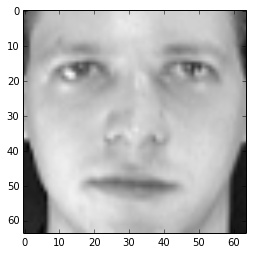

In [177]:
n_dim = 400
face_compressed = draw_face_compressed(face_01, n_dim)
plt.imshow(face_compressed.reshape(image_shape), cmap=mpl.cm.gray)